<a href="https://colab.research.google.com/github/Gruz77/Deep-Learning-in-Finance/blob/main/Hurst_Exponent/Hurst_exponent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Hurst Exponent <center/>
---
---
> The aim here is to use neural networks for Hurst exponent estimation. To compare the ANN and CNN networks, and to ask which architecture may be better.

In [ ]:
!pip install fbm
# !pip install ann_visualizer 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbm import fbm
from tqdm.notebook import tqdm
from keras.layers import LeakyReLU
# from ann_visualizer.visualize import ann_viz
plt.style.use("ggplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
# 1 - Dense Networks

## 1) $X_{train}$

- We generate $10000$ time series of length $T=100$ for $10$ values of $H \in [0,1]$.
  - We choose to generate with $H_{min}$ and $H_{max}$ very close to $0$ and $1$ so that our model is trained at "extreme" values. Indeed the test set will be composed of $H$ values $\in [0.01, 0.99]$.

In [ ]:
# X_train
T = 100
M = 10000
X_train = np.zeros((M*10,T))
Hs = np.linspace(0.01,0.99,10)
for i in tqdm(range(10), desc="X_train"):
  for k in range(M):
    X_train[(i*M)+k,:] = fbm(T-1, Hs[i], length=1) # (10 000, 100)

/usr/local/lib/python3.7/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


## $Y_{train}$


In [ ]:
# Y_train
Y_train = np.zeros([])
for k in range(len(Hs)):
  Y_train = np.vstack((Y_train, np.array([Hs[k]]*M).reshape((M,1))))
Y_train = Y_train[1:] # (10 000, 1)

## 2) $X_{test}$

- We generate $1000$ time series of length $T=100$ for $100$ values of $H \in [0.01,0.99]$. 

In [ ]:
# X_test
T = 100
M = 100
X_test = np.zeros((M*100,T))
Hs = np.linspace(0.01,0.99,100)
for i in tqdm(range(100), desc="X_test"):
  for k in range(M):
    X_test[(i*M)+k,:] = fbm(T-1, Hs[i])

/usr/local/lib/python3.7/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


## 3) ANN architecture

- EarlyStopping can be used to stop the training at a desired time in advance. 
Arguments : 
  - monitor: value of interest. "val_loss" for us
  - mode : min to stop the training when the monitored value stops decreasing.
  - patience : number of epochs without improvement before the training is stopped.

- To reduce overfitting, dropout layers can also be added:
  - At each training iteration, a random rate of neurons will be chosen (arugment rate) and these will be deactivated, this will reduce the sometimes too strong links that neurons create between them during learning.

- We decide to use the sigmoid activation function for the output layer (1 neuron) because Hurst's exponent is $\in [0,1]$.

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", mode="min", patience=10) 

In [ ]:
ANN = Sequential()

ANN.add(Dense(150, input_dim=T, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
ANN.add(Dense(150, activation="relu"))
# ANN.add(Dropout(rate=0.1))
ANN.add(LeakyReLU(alpha=0.3))

ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1)
ANN.add(Dense(150, activation="linear")) 
# ANN.add(LeakyReLU(alpha=0.1))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))

ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
# ANN.add(Dense(24, activation="tanh"))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="linear")) 
ANN.add(LeakyReLU(alpha=0.3))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))

ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
# ANN.add(Dense(24, activation="tanh"))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.1))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu")) 
ANN.add(LeakyReLU(alpha=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.1))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.1))


ANN.add(Dense(1, activation="hard_sigmoid"))

ANN.compile(loss="MSE", optimizer="adam", metrics=["mean_squared_error"]) 

ANN.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks=[es])
# ANN.fit(X_train, Y_train, validation_split=0.2, epochs=50)

# Visualize the ANN
# ann_viz(ANN, view=True, title="ANN")

Epoch 1/50
2500/2500 [==============================] - 9s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 2/50
2500/2500 [==============================] - 9s 3ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 3/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 4/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 5/50
2500/2500 [==============================] - 9s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 6/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 7/50
2500/

In [ ]:
ANN.save(".../ANN_Hurst.h5")

In [ ]:
ANN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 150)               15150     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 150)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 150)               22650     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 150)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 150)              

- The model has $377,701$ parameters

### Predictions

- We can use the $X_{test}$ matrix created in question 2) for our prediction

In [ ]:
from keras.models import load_model
ANN = load_model(".../ANN_Hurst.h5")

In [ ]:
predict = ANN.predict(X_test)
predict

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [0.7757924],
       [0.7755085],
       [0.7752903]], dtype=float32)

### Histogram of the first predicted values (for $H=0.01$ and $H=0.99$)

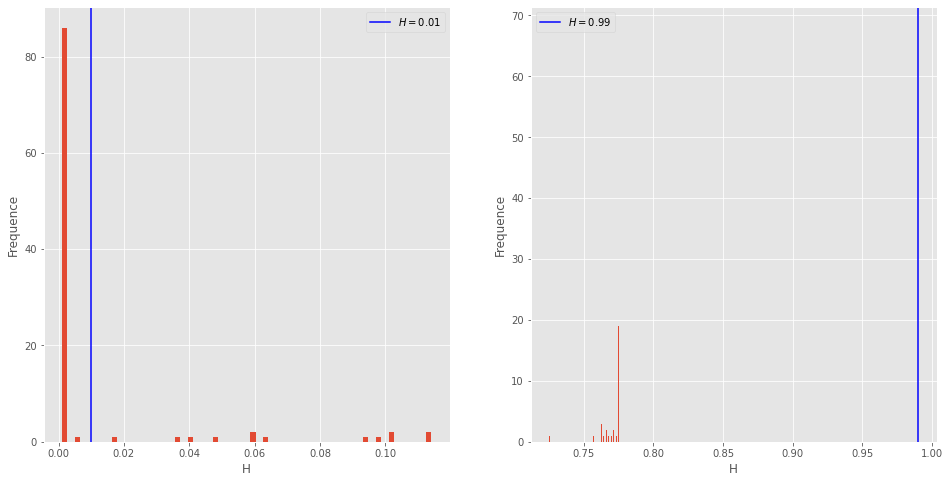

In [ ]:
# Histograms
fig, ax = plt.subplots(1,2,figsize=(16,8))
#sns.histplot(predict[:M], ax=ax[0], bins=100);
ax[0].hist(predict[:M],bins=30, rwidth=0.4)
ax[0].axvline(Hs[0],label="$H=0.01$", color="b");
ax[0].set_xlabel(f'H')
ax[0].set_ylabel(f'Frequence')
ax[0].legend()
#sns.histplot(predict[-M:], ax=ax[1],bins=100);
ax[1].hist(predict[-M:],bins=30, rwidth=0.4)
ax[1].axvline(Hs[-1], label="$H=0.99$", color="b");
ax[1].set_xlabel(f'H')
ax[1].set_ylabel(f'Frequence')
#ax[1].set_ylim(0,150)
ax[1].legend()
#plt.legend();

- We see that for the first $1000$ predictions (supposed to estimate $H=0.01$), the estimation could be much better. Indeed the Husrt coefficient tends to be underestimated by the neural network (most of the values estimated by the ANN are very close to 0)

- Then, we see that for $H=0.99$, our ANN clearly does not manage to get close to it, and remains "stuck" around 0.78. It is as if the neural network is unable to estimate values greater than 0.78

## 4) MBE et RMSE (ANN)


- For Root Mean Squared Error (RMSE), we have : 

  - $$RMSE = \sqrt{\sum\limits_{i=1}^{N}\frac{(\hat{y}_i - y_i)^{2}}{N}}$$
  - Since the errors are squared, this means that the RMSE gives greater importance to large errors. 

- For Mean Bias Error (MBE), we have :

  - $$MBE = \frac{1}{N}\sum\limits_{i=1}^{N}(\hat{y}_i - y_i)$$

In [ ]:
def RMSE(y_pred,y):
  return np.sqrt(np.sum((y_pred - y)**2)/len(y_pred))

In [ ]:
# Biais and RMSE
biais = np.zeros(100)
RMSE_val = np.zeros(100)

for i in range(100):
    biais[i] = np.mean(predict[i*M:(i+1)*M] - Hs[i])
    RMSE_val[i] = RMSE(predict[i*M:(i+1)*M], Hs[i])

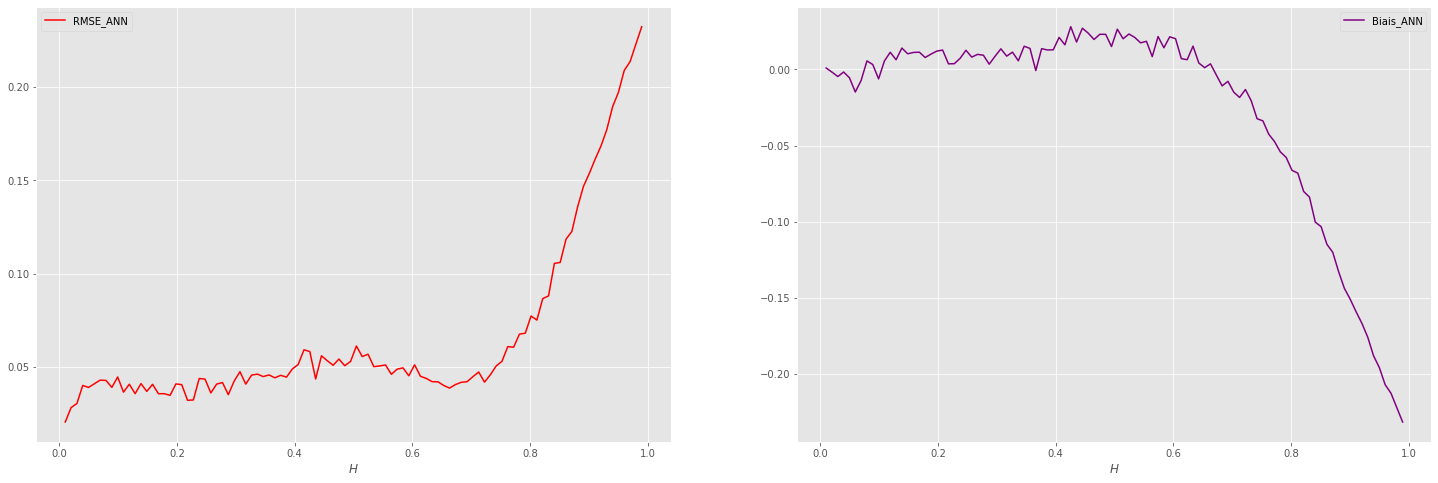

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
# ax[0].grid();ax[1].grid()
ax[0].set(xlabel=r"$H$");ax[1].set(xlabel=r"$H$")
ax[0].plot(Hs, RMSE_val, color="red", label="RMSE_ANN")
# ax[0].plot(Hs, RMSE_val_classic, color="blue", label="RMSE_classic")
ax[1].plot(Hs, biais, color="purple", label="Biais_ANN")
# ax[1].plot(Hs, biais_classic, color="aqua", label="Biais_classic")
ax[0].legend();ax[1].legend();

#plt.title("RMSE and MBE for ANN")

- We can clearly see that the dense network is a good estimator, given the low bias and RMSE.

- However, we notice that around $H=1$, the estimator loses a lot of efficiency, which translates into a sharp increase in the absolute value of the bias and the RMSE

## 5) MAE (ANN)

- Mean Absolute Error : 

$$ MAE = \frac{1}{N}\sum\limits_{i=1}^{N}\left| \hat{y}_i - y_i\right|$$ 

- The MAE does not consider the "direction" of errors, unlike the bias. And all errors have the same weight (as the bias).

In [ ]:
def MAE(y_pred,y):
  return np.sum(np.abs(y_pred - y))/len(y_pred)

In [ ]:
MAE_val = np.zeros(100)
for i in range(100):
    MAE_val[i] = MAE(predict[i*M:(i+1)*M], Hs[i])

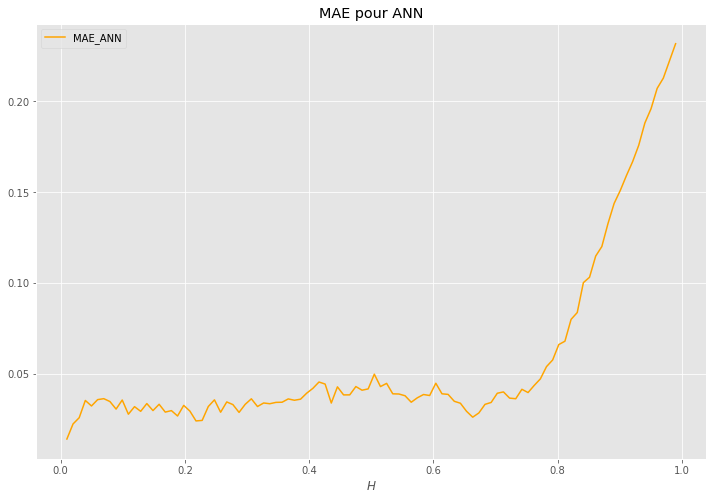

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel=r"$H$")
ax.plot(Hs, MAE_val, color="orange", label="MAE_ANN")
ax.legend()
plt.title("MAE pour ANN");

- As with the bais and RMSE, the MAE shows that the ANN is a good estimator up to about $H=0.8$.

--- 
# 2 - Convolutional neural networks (CNN)

- The fractional Brownian motion that we generate is thus a time series, thus presenting a time dependence (moreover if $H \ne \frac{1}{2}$ we have a long memory), and is defined as a convolution. \\
Thus, CNNS seem to be more appropriate.

## 1) Architecture of H. Stone's CNN, QF (2020)

- We note that in his paper, H.Stone compared his model with the method of moments, known to be inaccurate. 
  - A better approach would be to compare the results of the networks with the Wavelet method, which is known to be better.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", mode="min", patience=10) 

In [ ]:
# Initialisation
CNN = Sequential()

# kernel_size = 3
# Convolution
CNN.add(Conv1D(filters=32, kernel_size = 3, strides=1, input_shape=(100, 1), padding="valid"))
CNN.add(LeakyReLU(alpha=0.1))
# Max Pooling
CNN.add(MaxPool1D(pool_size=3, strides=1, padding='valid'))

CNN.add(Dropout(rate=0.25))

# Convolution 2
CNN.add(Conv1D(filters=64, kernel_size = 3, strides=1, padding="valid"))
CNN.add(LeakyReLU(alpha=0.1))
# Max Pooling 2
CNN.add(MaxPool1D(pool_size=3, strides=1, padding='valid'))

CNN.add(Dropout(rate=0.25))

# Convolution 3
CNN.add(Conv1D(filters=128, kernel_size = 3, strides=1, padding="valid"))
CNN.add(LeakyReLU(alpha=0.1))
# Max Pooling 3
CNN.add(MaxPool1D(pool_size=3, strides=1, padding='valid'))

CNN.add(Dropout(rate=0.4))

# Flattening
CNN.add(Flatten())

# ANN complétement connecté 
CNN.add(Dense(units=128, activation="relu"))

CNN.add(Dropout(rate=0.3))

CNN.add(Dense(units=1, activation="sigmoid"))

CNN.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

CNN.fit(np.expand_dims(X_train, axis=2), Y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[es])

Epoch 1/30
125/125 [==============================] - 31s 6ms/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 2/30
125/125 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 3/30
125/125 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 4/30
125/125 [==============================] - 1s 4ms/step - loss: 9.6027e-04 - mean_squared_error: 9.6027e-04 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 5/30
125/125 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 6/30
125/125 [==============================] - 1s 4ms/step - loss: 8.6306e-04 - mean_squared_error: 8.6306e-04 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 7/30


In [ ]:
CNN.save(".../CNN_Hurst.h5")

In [ ]:
from keras.models import load_model
CNN = load_model(".../CNN_Hurst.h5")

In [ ]:
predict_CNN = CNN.predict(np.expand_dims(X_test, axis=2))
predict_CNN

array([[0.07313687],
       [0.04322831],
       [0.07819702],
       ...,
       [0.8046245 ],
       [0.80323684],
       [0.806398  ]], dtype=float32)

### Histogram of the first predicted values (for $H=0.01$ and $H=0.99$)

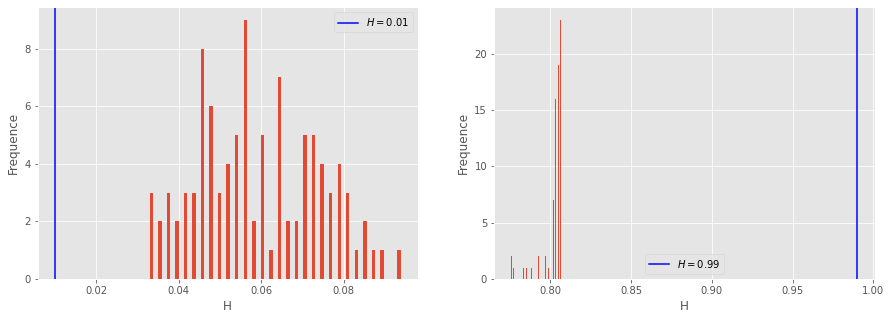

In [ ]:
# Histograms
fig, ax = plt.subplots(1,2,figsize=(15,5))
#sns.histplot(predict[:M], ax=ax[0], bins=100);
ax[0].hist(predict_CNN[:M],bins=30, rwidth=0.4)
ax[0].axvline(Hs[0],label="$H=0.01$", color="b");
ax[0].set_xlabel(f'H')
ax[0].set_ylabel(f'Frequence')
ax[0].legend()
#sns.histplot(predict[-M:], ax=ax[1],bins=100);
ax[1].hist(predict_CNN[-M:],bins=30, rwidth=0.4)
ax[1].axvline(Hs[-1], label="$H=0.99$", color="b");
ax[1].set_xlabel(f'H')
ax[1].set_ylabel(f'Frequence')
#ax[1].set_ylim(0,150)
ax[1].legend()
#plt.legend();

- The Hurst coefficient is overestimated for low values of H. On the other hand, it always seems to be "blocked" at around H = 0.80 

## 3) MBE and RMSE (CNN and ANN)

In [ ]:
# Bias and RMSE
biais_CNN = np.zeros(100)
RMSE_val_CNN = np.zeros(100)

for i in range(100):
    biais_CNN[i] = np.mean(predict_CNN[i*M:(i+1)*M] - Hs[i])
    RMSE_val_CNN[i] = RMSE(predict_CNN[i*M:(i+1)*M], Hs[i])

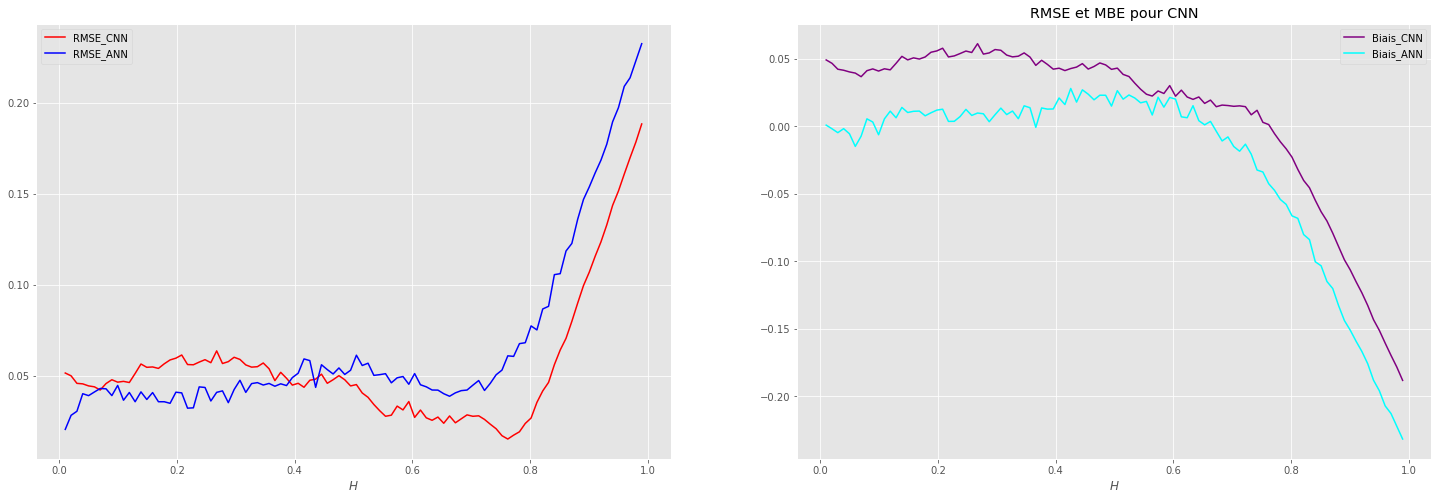

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
ax[0].set(xlabel=r"$H$");ax[1].set(xlabel=r"$H$")
ax[0].plot(Hs, RMSE_val_CNN, color="red", label="RMSE_CNN")
ax[0].plot(Hs, RMSE_val, color="blue", label="RMSE_ANN")
ax[1].plot(Hs, biais_CNN, color="purple", label="Biais_CNN")
ax[1].plot(Hs, biais, color="aqua", label="Biais_ANN")
ax[0].legend();ax[1].legend();
#plt.title("RMSE et MBE pour CNN");

- From an RMSE point of view :
  - for $H < 0.4$, the dense network is better than the convolutional.
  - for $H > 0.4$, it is the opposite. 

- In terms of bias:
  - For $H < 0.7$, the bias of the ANN is clearly lower than that of the CNN.
  - When $H$ approaches $1$, the bias of the dense network becomes greater than that of the $CNN$, as in the case of the RMSE. 

- Knowing that the Hurst coefficient for a financial series is around $H=0.15$, this would push to favour the ANN.

## 4) MAE (CNN and ANN)

In [ ]:
MAE_val_CNN = np.zeros(100)
for i in range(100):
    MAE_val_CNN[i] = MAE(predict_CNN[i*M:(i+1)*M], Hs[i])

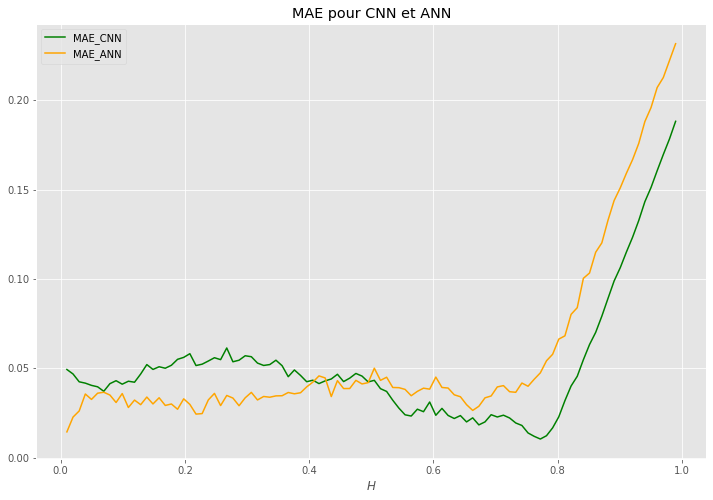

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel=r"$H$")
ax.plot(Hs, MAE_val_CNN, color="green", label="MAE_CNN")
ax.plot(Hs, MAE_val, color="orange", label="MAE_ANN")
ax.legend()
plt.title("MAE pour CNN et ANN");

- We observe the same things as for the RMSE, except that the ANN becomes worse for a $H$ slightly above $0.5$.

# 5) Comparing the ANN and the CNN 

- Considering the three risk measures presented in this section and the previous one for both networks, the opinion is necessarily mixed. However we can say that for $H < 0.5$ the dense network is better than H.Stone's CNN, and based on recent research ($H \sim 0.15$ for financial series), we can say that the ANN is to be preferred.

- In addition to that, it is clearly less expensive in terms of computing time.

- We could also wonder why the two estimators struggle to estimate $H$ when it tends to $1$ and remain "frozen" around $0.8$.
  - We plot two fractional Brownian motions, for $H=0.01$ and for $H=0.99$.

/usr/local/lib/python3.7/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


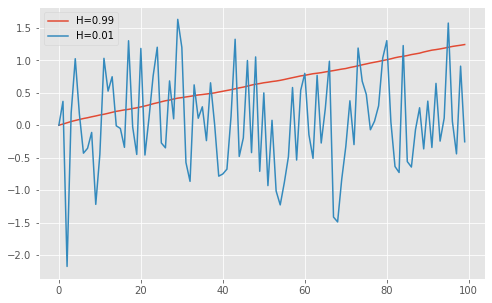

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(fbm(99, 0.99, length=1), label="H=0.99")
plt.plot(fbm(99, 0.01, length=1), label="H=0.01")
plt.legend();

- We can see that the closer $H$ is to $1$, the smoother the movement. In fact if $H=1$ the movement is ballistic, which is not at all interesting for volatility.

- Maybe the network can't detect any intrinsic features of the process because it is so smooth,
  - i.e. the fBMs with an $H$ close to $1$ will be difficult to differentiate, 
  - whereas those with more fluctuations will be much more so, intuitively.

---
# 3 - Wavelets

- Here we will try to estimate the Hurst exponent with the Wavelets method
  - For this we need to use the R package "liftLRD". 
  - We will use R from Python
  - Then we will compare the results obtained
  - This will allow us to compare the neural networks with the best "classical" estimator

### Importing the function from R

In [ ]:
%%capture
from rpy2.robjects.packages import importr
utils = importr("utils")
utils.install_packages("liftLRD")

# conversion numpy <-> objets R
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

# charger la bibliothèque
liftLRD = importr("liftLRD")

### Application

- The lift.Hurst function was exploding the session RAM. We therefore chose to run it locally, then export the result as a csv file.

- The calculation time being relatively long, we limit ourselves to M = 100 (3h30 of calculation)

# 1) Implementation

In [ ]:
M = 100 # Same as M_test
H_waves = np.zeros((100,M))

for i in tqdm(range(100), desc=" H "):
  X_h = X_test[i*M:(i+1)*M,:] 
  for j in  tqdm(range(M), desc="M"):
    H_waves[i,j] = liftLRD.liftHurst(np.diff(X_h[j,:]))[1]

In [ ]:
import pandas as pd
H_waves = pd.read_csv('.../H_w.csv')
H_wavelets = H_waves.values.flatten()

In [ ]:
MAE_val_waves = np.zeros(100)
biais_val_waves = np.zeros(100)
RMSE_val_waves = np.zeros(100)

for i in range(100):
    MAE_val_waves[i] = MAE(H_wavelets[i*M:(i+1)*M], Hs[i])
    biais_val_waves[i] = np.mean(H_wavelets[i*M:(i+1)*M] - Hs[i])
    RMSE_val_waves[i] = RMSE(H_wavelets[i*M:(i+1)*M], Hs[i])

# 2) Biais and RMSE

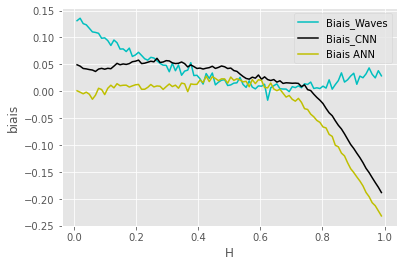

In [ ]:
 plt.plot(Hs,biais_val_waves,label='Biais_Waves',color='c')
plt.plot(Hs,biais_CNN,label='Biais_CNN',color='k')
plt.plot(Hs,biais,label='Biais ANN',color='y')
plt.xlabel('H')
plt.ylabel('biais')
plt.legend()
plt.show()

- We notice that the bias is more important for low values of H when using the wavelet method. On the other hand, it is very close to 0 for H around 0.6 and does not increase for H > 0.8 as is the case for the ANN and CNN networks.

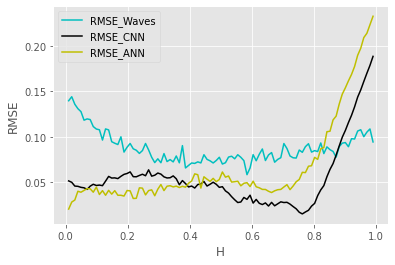

In [ ]:
plt.plot(Hs,RMSE_val_waves,label='RMSE_Waves',color='c')
plt.plot(Hs,RMSE_val_CNN,label='RMSE_CNN',color='k')
plt.plot(Hs,RMSE_val,label='RMSE_ANN',color='y')
plt.xlabel('H')
plt.ylabel('RMSE')
plt.legend()
plt.show()

- The same phenomenon can be observed in the calculation of the RMSE.

## 3) MAE

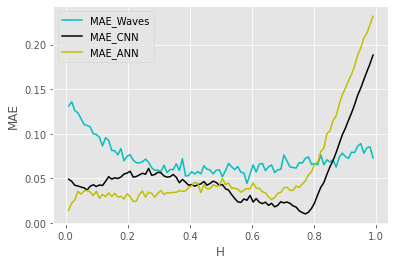

In [ ]:
plt.plot(Hs,MAE_val_waves,label='MAE_Waves',color='c')
plt.plot(Hs,MAE_val_CNN,label='MAE_CNN',color='k')
plt.plot(Hs,MAE_val,label='MAE_ANN',color='y')
plt.xlabel('H')
plt.ylabel('MAE')
plt.legend()
plt.show()

- It can be seen that in the case of the Hurst coefficient estimation by wavelets, the MAE is higher for low values of H (compared to the ANN and DNN networks). However, this method is not impacted by the increase of the MAE for H close to 0.80. Indeed, contrary to the previous cases, the error does not increase after this limit.

#Conclusion

- Finally, we compared two types of neural networks: ANN and CNN. As well as a more classical model: Wavelets.

- The performances of these two methods are comparable and seem to depend on the order of magnitude of H and thus on the type of series we are studying. 
  - We can conclude as in 5) that for the case of financial series ($H \sim 0.15$) we can say that the ANN is to be preferred.
  - However, we noticed that for H > 0.8, the ANN and CNN were unable to correctly estimate H. On the other hand, the wavelet method allows to correctly estimate time series with a Hurst exponent close to 1. 

- Depending on the type of series (long memory / short memory / erratic....), one can therefore choose which method to use to obtain the most accurate result.